# Assignment 
[https://github.com/HiGal/numerical_methods](https://github.com/HiGal/numerical_methods)

Firs step let's solve equation *$ y' = f(x,y)$*

$f(x,y) = y^4\cos \left(x\right)+y\tan \left(x\right) $

$y'\:=y^4\cos \left(x\right)+y\tan \left(x\right) $

1) $ \mathrm{Rewrite\:in\:the\:form\:of\:a\:first\:order\:Bernoulli\:ODE}:\quad \:y'+p\left(x\right)y=q\left(x\right)y^n $

$y'\:-\tan \left(x\right)y=\cos \left(x\right)y^4$

2) $\mathrm{Solve\:as\:first\:order\:Bernoulli\:ODE}:\quad $

$\mathrm{Answer\:}:\quad \: y=\frac{1}{(-3\cos^{2}\left(x\right)\sin\left(x\right)+c_1\cos{^3}(x))^{1/3}} $ - Analitical general solution


Area of allowable values for $c_1$: $ c_1 \in (- \infty; 3tan x) \cup (3tan x ;+ \infty) $

From the analytical answer we can conclude that $y\neq 0 \: and \: x\neq\pi n + \arctan(\frac{1}{3})$

Let's take $y_0 = 1,x_0=0$, then $c_1 = 1$ and 
$y=\frac{1}{(-3\cos^{2}\left(x\right)\sin\left(x\right)+\cos{^3}(x))^{1/3}}$

We can see that $\lim_{x\to \pi n + \arctan(\frac{1}{3})}y=\infty$

In [261]:
from IPython.html.widgets import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import traceback
sns.set()

%config InlineBackend.figure_format='retina'

In [262]:

def f(x,y):
    return y**4*math.cos(x)+y*math.tan(x)

def yf(x):
    a = (math.cos(x)**3-3*math.sin(x)*math.cos(x)**2)
    if a < 0:
        return 1/(-math.pow(-a,1/3))
    else:
        return 1/a**(1/3)


       

## Analytical

In [267]:
def analitical_method(y0,x0,xn,step):
    x_arr = np.arange(x0,xn,step)
    y = []
    x_n = []
    for x in x_arr:
        try:
            y.append(yf(x))
            x_n.append(x)
        except OverflowError:
            y.append(np.nan)
            x_n.append(x)
            y.append(yf(x+0.05))
            x_n.append(x+0.05) 
    y = np.array(y)        
    plt.figure(figsize=(8,8))
    plt.ylim((-10,10))
    plt.plot(x_n,y[:len(x_n)])
    plt.show()

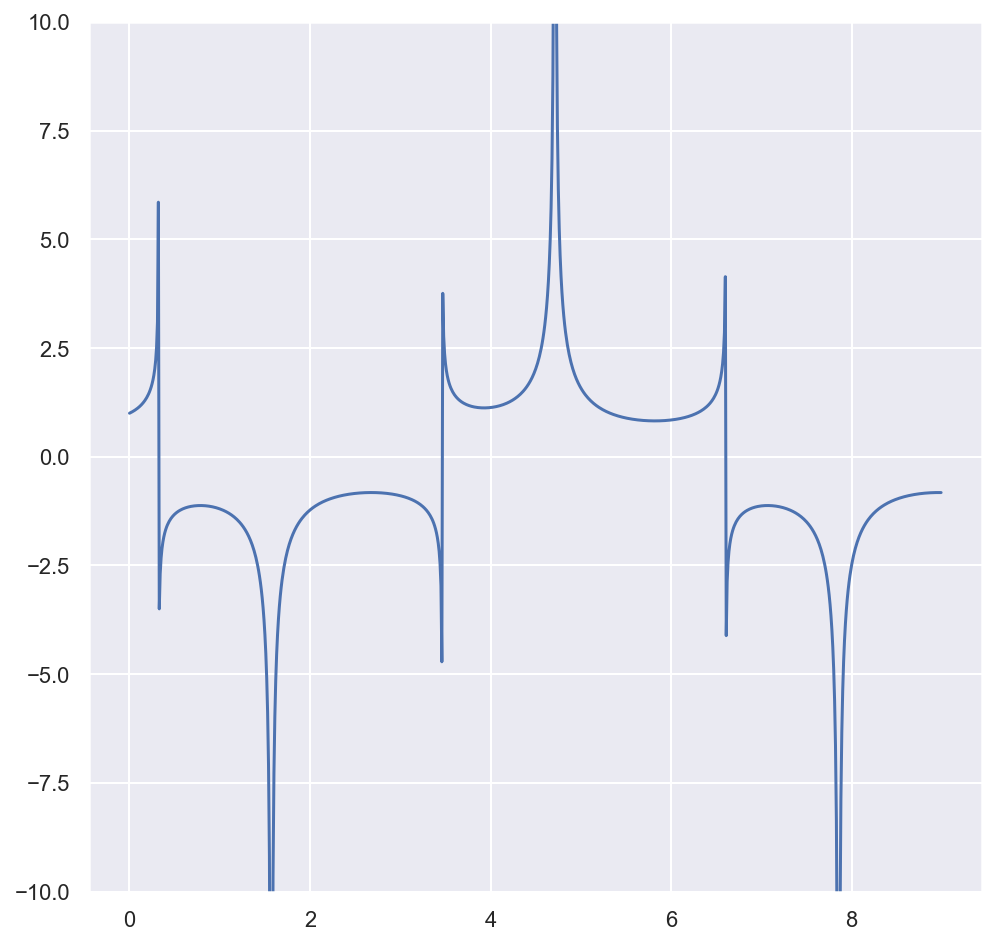

In [268]:
interact(analitical_method,y0=(1,3,0.1),step=(0.01,1,0.01),x0 = (0,9,1),xn=(9,18,1))

## Euler method

In [282]:
def euler_method_graph(y0,x0,xn,step):
    y=[y0]
    x_arr = np.arange(x0,xn,step)
    x_n=[]
    y_error = []
    for x in x_arr:
        try:
            y_n = y[-1] + step*f(x,y[-1]) 
            y_error.append(yf(x)-y_n)
            y.append(y_n)
            x_n.append(x)
        except OverflowError:
            y.append(np.nan)
            x_n.append(x)
            y.append(yf(x+0.05))
            y_error.append(np.nan)
            y_error.append(0)
            x_n.append(x+0.05)        
    y = np.array(y)
    y_error = np.array(y_error)
    plt.figure(figsize=(8,8))
    plt.ylim((-10,10))
    plt.plot(x_n,y[:len(x_n)],label='Euler method')
    plt.plot(x_n,y_error[:len(x_n)], label='Error')
    plt.legend()
    plt.show()

def euler_method(y0,x0,xn,step):
    y=[y0]
    x_arr = np.arange(x0,xn,step)
    x_n=[]
    for x in x_arr:
        try:
            y_n = y[-1] + step*f(x,y[-1]) 
            y.append(y_n)
            x_n.append(x)
        except OverflowError:
            y.append(np.nan)
            x_n.append(x)
            y.append(yf(x+0.05))
            x_n.append(x+0.05)        
    y = np.array(y)
    return zip(x_n,y)

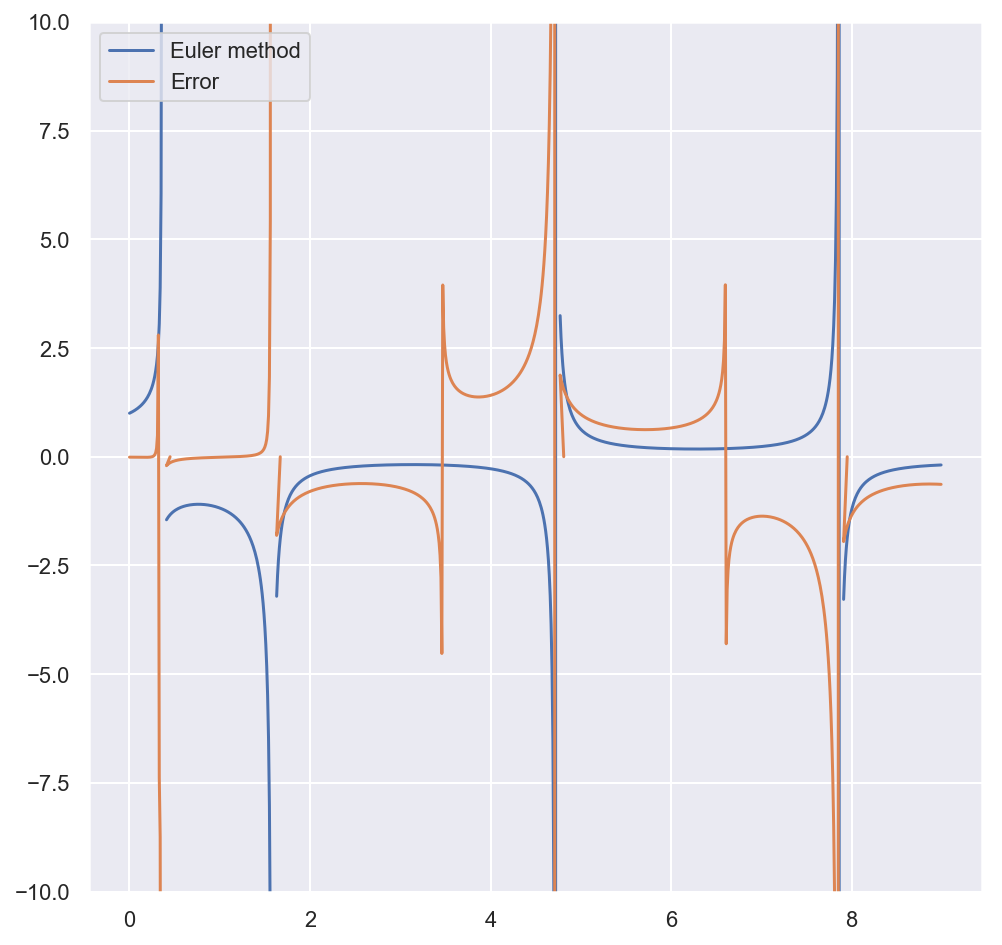

In [275]:
interact(euler_method_graph,y0=(1,3,0.1),step=(0.01,1,0.01),x0 = (0,9,1),xn=(9,18,1))

## Improved Euler method

In [292]:
def improved_euler_graph(y0,x0,xn,step):
    y=[y0]
    x_arr = np.arange(x0,xn,step)
    x_n=[]
    y_error = []
    for x,y_eu in euler_method(y0,x0,xn,step):
        try:
            y_n = y[-1]+step*(f(x,y[-1])+f(x,y_eu))/2
            y.append(y_n)
            x_n.append(x)
        except OverflowError:
            y.append(np.nan)
            x_n.append(x)
            y.append(yf(x+0.05))
            x_n.append(x+0.05)
    y = np.array(y)
    print(y)
    plt.figure(figsize=(8,8))
    plt.ylim((-10,10))
    plt.plot(x_n,y[:len(x_n)],label='Improved Euler method')
    plt.show()

/Users/faritgaleev/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[ 1.90000000e+000 -1.25924430e+000 -4.44402717e+000  5.83870262e+001
  4.11796290e+006  1.38053680e+026  1.77367142e+104              inf
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan]


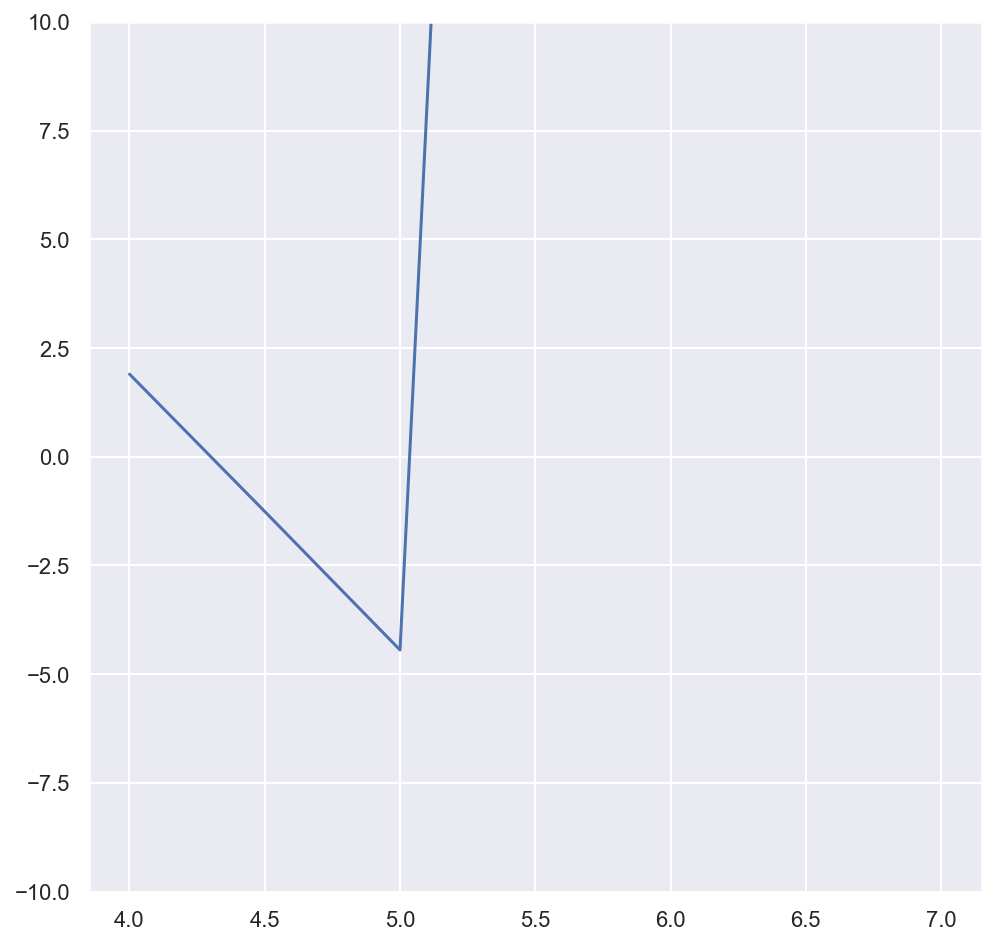

<function __main__.improved_euler_graph(y0, x0, xn, step)>

In [293]:
interact(improved_euler_graph,y0=(1,3,0.1),step=(0.01,1,0.01),x0 = (0,9,1),xn=(9,18,1))